## Imports

In [29]:
from pathlib import Path # reads paths in the current OS
import pandas as pd
import numpy as np
import yaml
import utils as ut
import plot_utils as pu
import matplotlib.pyplot as plt
from PIL import Image
import plotly.io as pio
pio.renderers.default = "svg" #so that plotly output shows on Github (although it is not interactive)

## Reading

In [2]:
with open(Path('conf') / 'paths.yaml') as file:
    config = yaml.full_load(file)

data = pd.read_csv(Path(config['input_path']) / "all_data.csv", sep=",").fillna('')
locations_df = pd.read_csv(Path(config['input_path']) /  'municipis_merge.csv').fillna('')

In [3]:
data.shape

(540, 36)

In [4]:
vdp = pd.read_csv(Path(config['input_path']
                           ) / 'vdp_clean.csv').fillna('')

## Pre-process

In [5]:
data = data.merge(locations_df[['Comarca','Provincia']].drop_duplicates(), 
                  left_on = 'comarca_origin',right_on='Comarca',how='left')

In [6]:
data['comarca_origin'] = data['comarca_origin'].str.replace(r'^Urgell','Baix Urgell')

In [7]:
# it takes a minute
com_coord = ut.get_comarca_coords(data)

In [8]:
aux_text = {'total':'en total',
            'n_abastiment':'abastiment',
            'n_pagesos':'pagesos',
            'vegetables':'de verdures',
           'fruit':'de fruita',
           'meat':'de carn',
           'iseco':'ecos',
           'n_comarcas_delivery':'comarques amb enviament'}
max_size = 40

In [9]:
n_columns = ['n_main_prod','n_other_prod','n_tot_prod','n_paym_methods','n_comarcas_delivery']

## Abastiment + pagesos producers in Venta de Proximitat dataset

In [10]:
ds_intersection = data[data.marca_vdp != '']
ds_intersection.shape

(23, 38)

## Comparing abastiment+pagesos and venta de proximitat


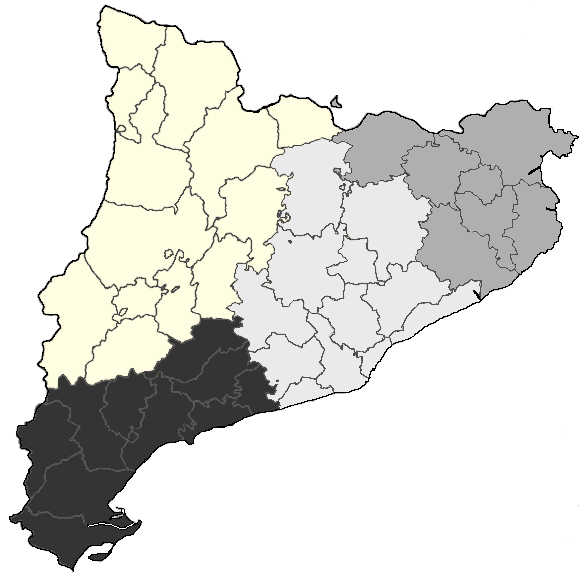


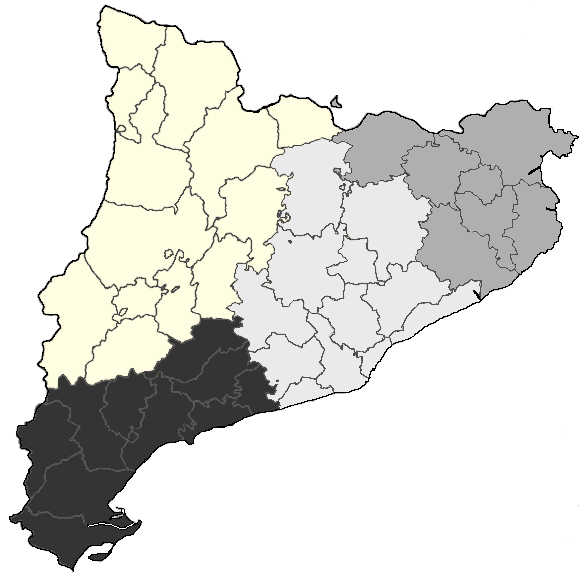


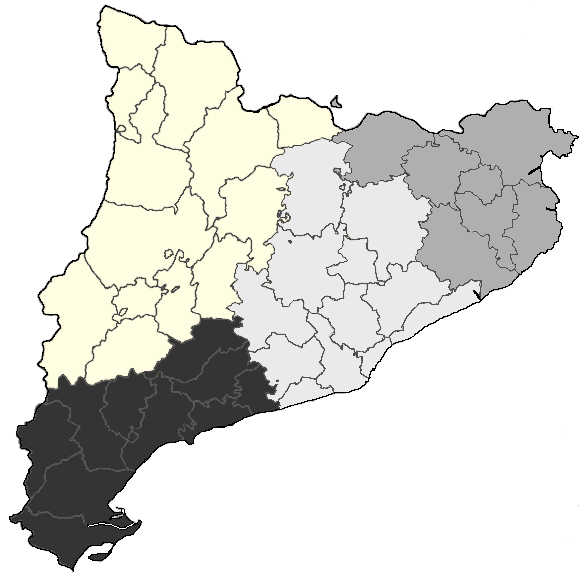


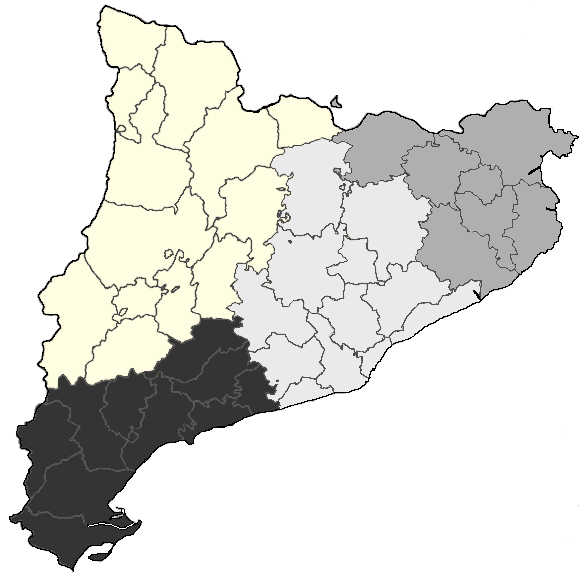

In [28]:
n_columns_red = ['n_main_prod','n_other_prod','n_tot_prod']
aux_text_red = {'total':'en total',
            'vegetables':'de verdures',
           'fruit':'de fruita',
           'meat':'de carn'}
to_plot_vdp = ut.dataset_to_plot(vdp,com_coord,n_columns_red,multiple_origins=False)
to_plot = ut.dataset_to_plot(data,com_coord,n_columns,multiple_origins=True)

# plot n not percentages
cat = Image.open(Path(config['input_path']) /'catalunya3.png')
x_low,x_up = 0.18,3.3
y_low,y_up = 40.5,42.9


for col,txt in aux_text_red.items():
    #max_value = max(to_plot_vdp[col].max(),to_plot[col].max())
    fig = pu.plot_map_comarca_points(to_plot,cat,col,txt,max_size,to_plot[col].max(),x_low,x_up,y_low,y_up)
    pu.add_trace_plot(fig,to_plot_vdp,col,txt,max_size,to_plot_vdp[col].max(),
                      '#022d63',series_name='Venda de proximitat')
    
    fig.show()

## Venta de Proximitat data


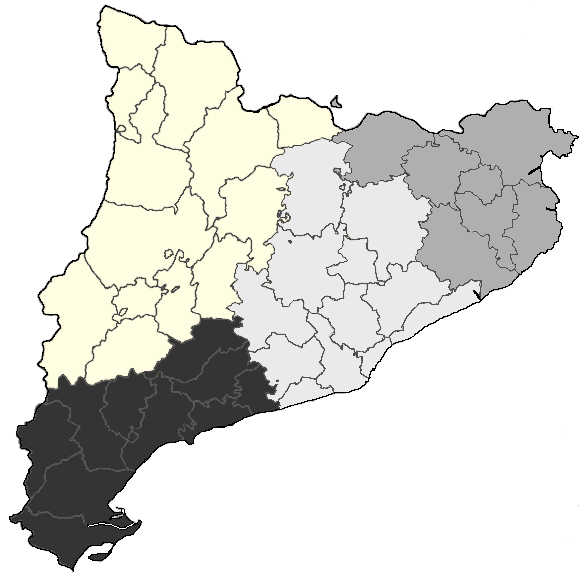


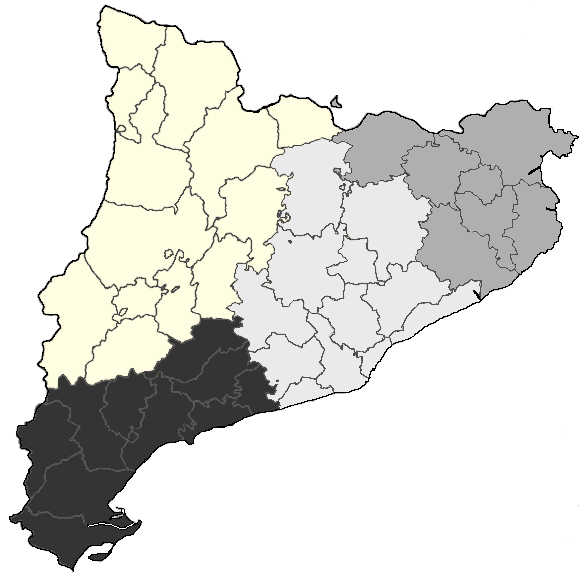


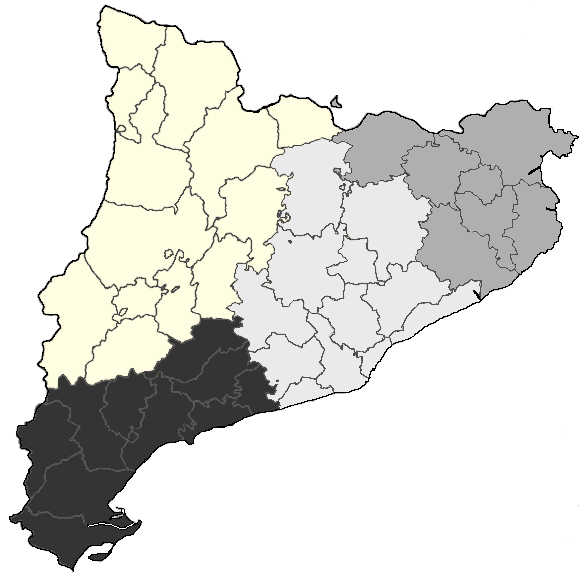


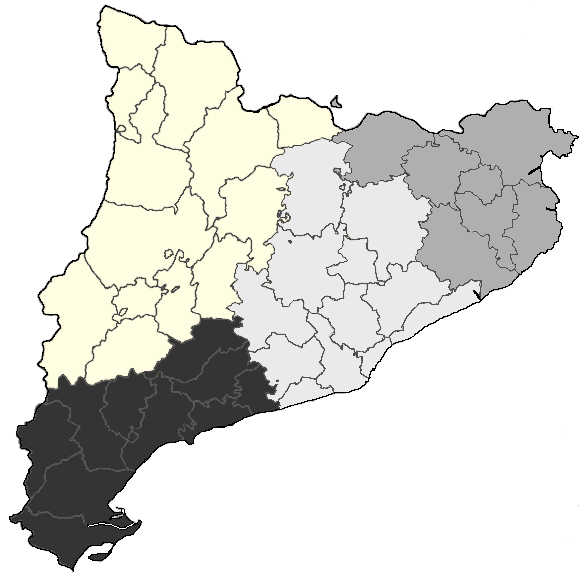

In [14]:
n_columns_red = ['n_main_prod','n_other_prod','n_tot_prod']
aux_text_red = {'total':'en total',
            'vegetables':'de verdures',
           'fruit':'de fruita',
           'meat':'de carn'}
to_plot = ut.dataset_to_plot(vdp,com_coord,n_columns_red,multiple_origins=False)

# plot n not percentages
cat = Image.open(Path(config['input_path']) /'catalunya3.png')
x_low,x_up = 0.18,3.3
y_low,y_up = 40.5,42.9


for col,txt in aux_text_red.items():
    fig = pu.plot_map_comarca_points(to_plot,cat,col,txt,max_size,to_plot[col].max(),x_low,x_up,y_low,y_up)
    fig.show()

## Abastiment + Pagesos data

In [15]:
to_plot = ut.dataset_to_plot(data,com_coord,n_columns,multiple_origins=True)


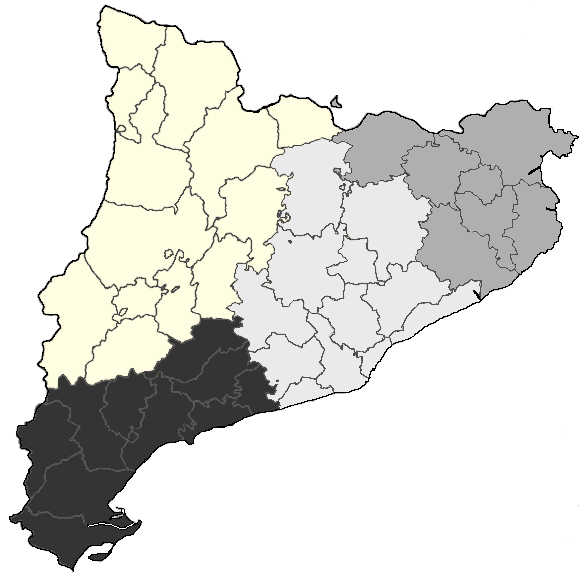


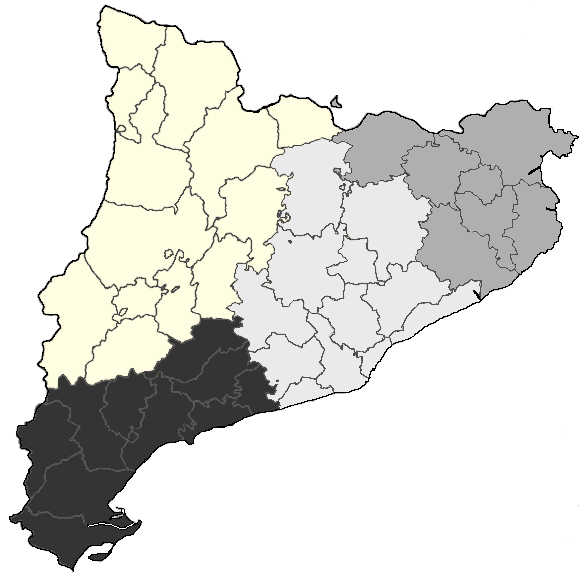


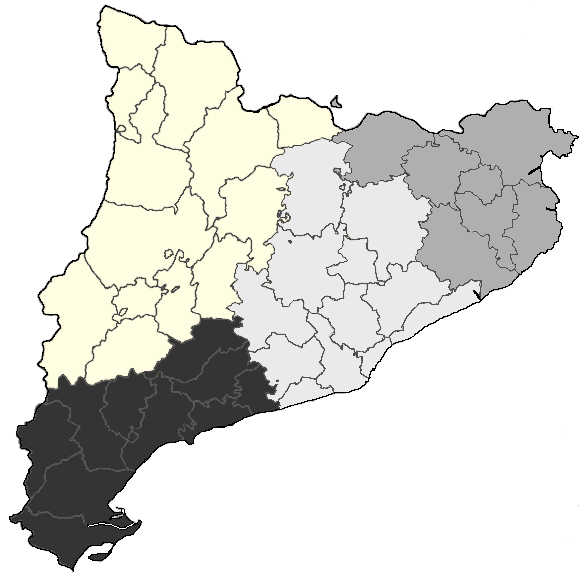


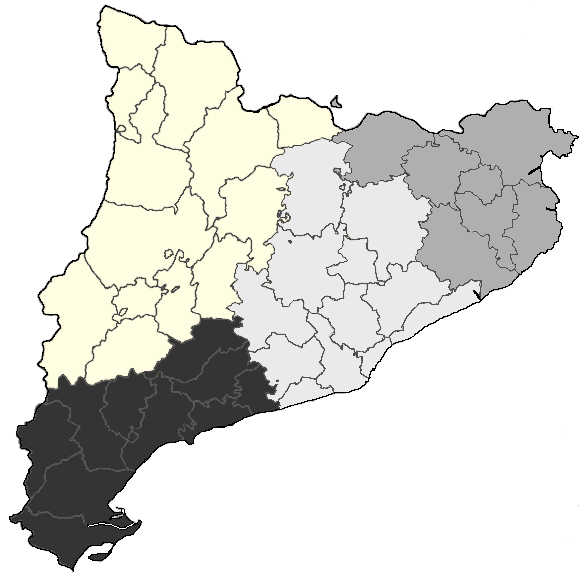


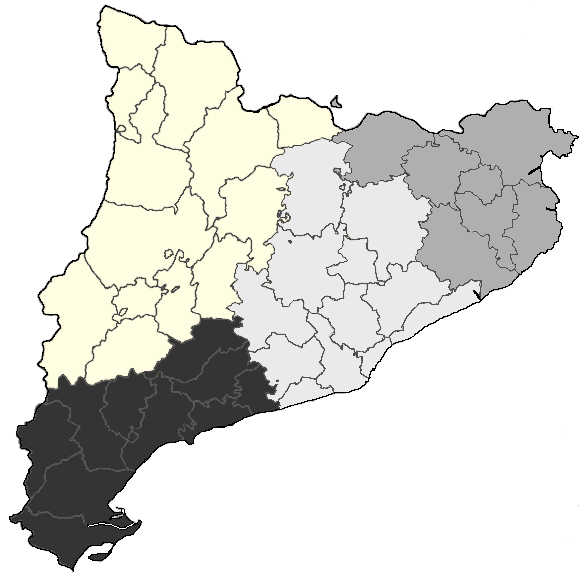


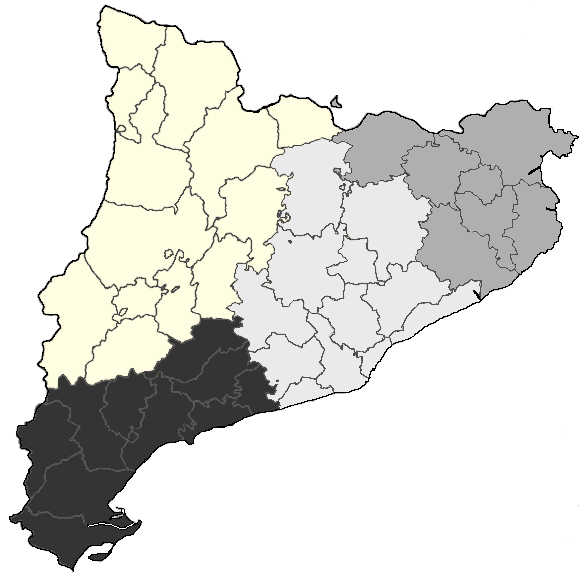


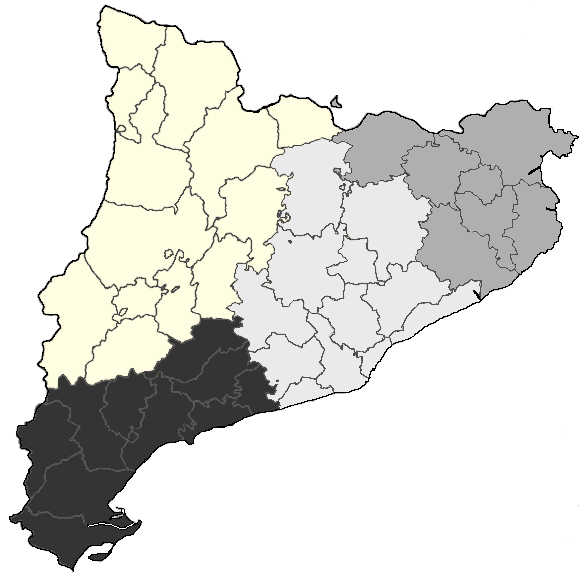


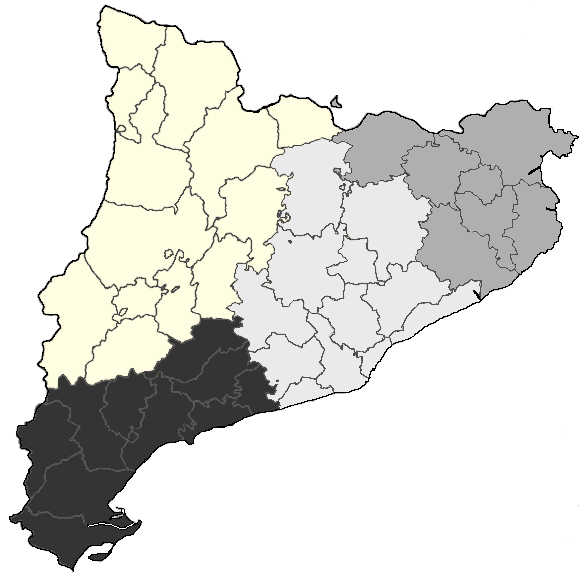

In [16]:
# plot n not percentages
cat = Image.open(Path(config['input_path']) /'catalunya3.png')
x_low,x_up = 0.18,3.3
y_low,y_up = 40.5,42.9


for col,txt in aux_text.items():
    fig = pu.plot_map_comarca_points(to_plot,cat,col,txt,max_size,to_plot[col].max(),x_low,x_up,y_low,y_up)
    fig.show()

## Plots separating dataset origin

### Related to columns with counts

In [17]:
aux_text = {'n_tot_prod':'Mitja productes',
           'n_other_prod':'Mitja productes no principals',
           'n_main_prod':'Mitja productes principals',
            'n_paym_methods':'Mitja métodes de pagament'}
for col,txt in aux_text.items():
    pu.bar_perc_separate_datasets(data, col, txt)

### Related to other products with some filters

In [18]:
pu.bar_perc_separate_datasets(data[(data.n_main_prod==0) & (data.n_tot_prod>0)],
                         'n_other_prod',aux_text['n_other_prod'])
pu.bar_perc_separate_datasets(data[(data.n_main_prod==1)],'n_other_prod',aux_text['n_other_prod'])
pu.bar_perc_separate_datasets(data[(data.n_main_prod>=2)],'n_other_prod',aux_text['n_other_prod'])

Quan no venen productes principals, la majoria venen únicament un producte (no principal).

Quan venen un producte principal, la majoria no venen altre tipus de producte.

Quan venen més d'un producte principal, acostumen a vendre més tipus de productes.